In [12]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


In [2]:
path_img = 'data/Section-6/s2_kunming_chenggong_6bands_20m.tif'


In [3]:
rsimg = rio.open(path_img)
rsimg.crs
rsimg.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1497,
 'height': 1611,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 268180.0,
        0.0, -20.0, 2765440.0)}

In [6]:
rsimg_arr = rsimg.read()
rsimg_arr = np.float32(rsimg_arr)
mndwi = (rsimg_arr[1]-rsimg_arr[4])/(rsimg_arr[1]+rsimg_arr[4]+0.00001)


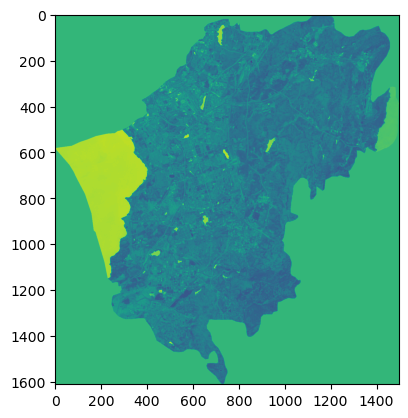

In [7]:
plt.imshow(mndwi)


In [8]:
path_out = 'data/Section-6/s2_kunming_chenggong_6bands_20m_mndwi.tif'
with rio.open(path_out, 'w', 
         driver=rsimg.driver,
         width=rsimg.width,
         height=rsimg.height,
         count=1,
         dtype=np.float32,
         crs=rsimg.crs,
         transform=rsimg.transform
         ) as dst:
    dst.write(mndwi, 1)



In [10]:
path_vec = 'data/Section-6/s2_chenggong_mndwi_thre01_poly.gpkg'
path_img = 'data/Section-6/s2_kunming_chenggong_6bands_20m.tif'


In [16]:
rsimg_rio = rio.open(path_img)
rsimg_arr = rsimg_rio.read()
print(rsimg_arr.shape)
vec_gpd = gpd.read_file(path_vec)


(6, 1611, 1497)


<Axes: >

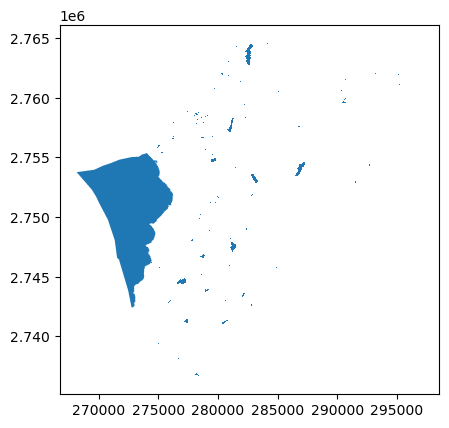

In [14]:
vec_gpd.plot()


In [ ]:
from rasterio import features
vec2raster = features.rasterize(shapes=vec_gpd.geometry, 
                                out_shape=rsimg_arr[0].shape,
                                default_value=1,
                                fill=0,
                                transform=rsimg_rio.transform,
                                dtype=None)

In [21]:
vec2raster.shape

(1611, 1497)

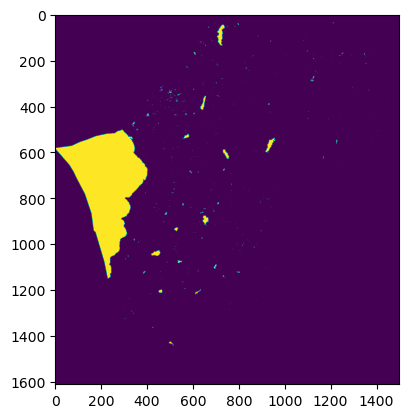

In [22]:
plt.imshow(vec2raster)



In [29]:
path_raster = 'data/Section-6/s2_chenggong_mndwi_thre01_poly2raster.tif'
raster_rio = rio.open(path_raster)
raster_arr = raster_rio.read(1)
raster_arr.shape
raster_rio.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 1000,
 'height': 1000,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(28.94, 0.0, 268180.0,
        0.0, -28.16, 2764720.0)}

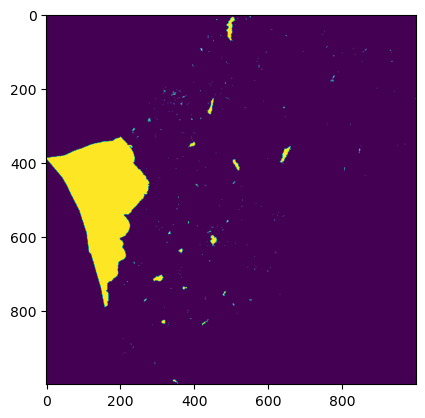

In [ ]:
plt.imshow(raster_arr)

{'type': 'Polygon',
 'coordinates': [[(278482.64, 2736588.16),
   (278482.64, 2736560.0),
   (278511.58, 2736560.0),
   (278511.58, 2736588.16),
   (278482.64, 2736588.16)]]}

In [37]:
from shapely.geometry import shape
values, geos = [], []
for geo, value in features.shapes(np.float32(raster_arr), transform=raster_rio.transform):
    if value == 10:
        values.append(value)
        geos.append(geo)

geos = [shape(geo) for geo in geos]
dict = {'DN':values, 'geometry':geos}
region_gpd = gpd.GeoDataFrame(dict, crs='EPSG:32648')


<Axes: >

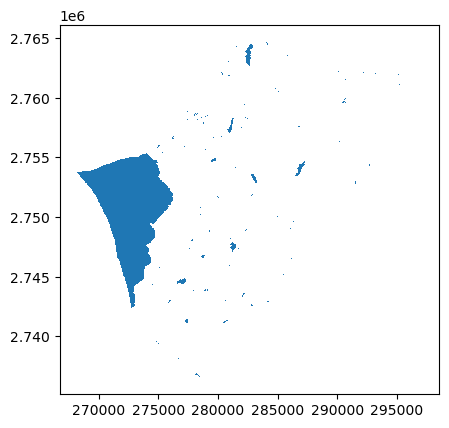

In [38]:
region_gpd.plot()
